@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg

In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 2

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

In [3]:
df

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:30.451561,NaN,610.8765,0.0000,2319.62160,831.95230,403.3569,0.00000,577.58466,457.06552,219.21864,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.866673,45.647266,50.158504,0.00000
2022-01-20 00:01:30.451561,NaN,1221.7530,0.0000,927.84863,415.97614,403.3569,299.53607,577.58466,0.00000,0.00000,...,51.61536,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2022-01-20 00:02:30.451561,NaN,1221.7530,491.7059,927.84863,0.00000,806.7138,0.00000,0.00000,228.53276,0.00000,...,0.00000,0.000000,43.441692,0.000000,0.000000,0.000000,0.000000,45.647266,0.000000,60.36797
2022-01-20 00:03:30.451561,NaN,0.0000,983.4118,463.92432,1663.90450,1210.0707,0.00000,577.58466,228.53276,0.00000,...,0.00000,46.115623,0.000000,38.311687,0.000000,35.854694,0.000000,45.647266,0.000000,0.00000
2022-01-20 00:04:30.451561,NaN,610.8765,983.4118,1391.77300,831.95230,1210.0707,599.07214,577.58466,228.53276,438.43730,...,0.00000,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,45.647266,50.158504,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:55:30.451561,NaN,2443.5060,983.4118,2319.62160,1247.92830,1210.0707,599.07214,1443.96150,0.00000,438.43730,...,51.61536,92.231250,86.883385,0.000000,79.480675,35.854694,37.866673,136.941800,100.317010,120.73594
2022-01-21 23:56:30.451561,NaN,1832.6294,1966.8236,1855.69730,415.97614,2016.7845,299.53607,1443.96150,457.06552,657.65594,...,51.61536,46.115623,0.000000,38.311687,79.480675,35.854694,75.733345,136.941800,50.158504,482.94376
2022-01-21 23:57:30.451561,NaN,1221.7530,2458.5295,927.84863,1247.92830,2823.4985,1497.68030,577.58466,1142.66380,438.43730,...,154.84608,46.115623,130.325070,38.311687,0.000000,71.709390,75.733345,45.647266,250.792510,0.00000


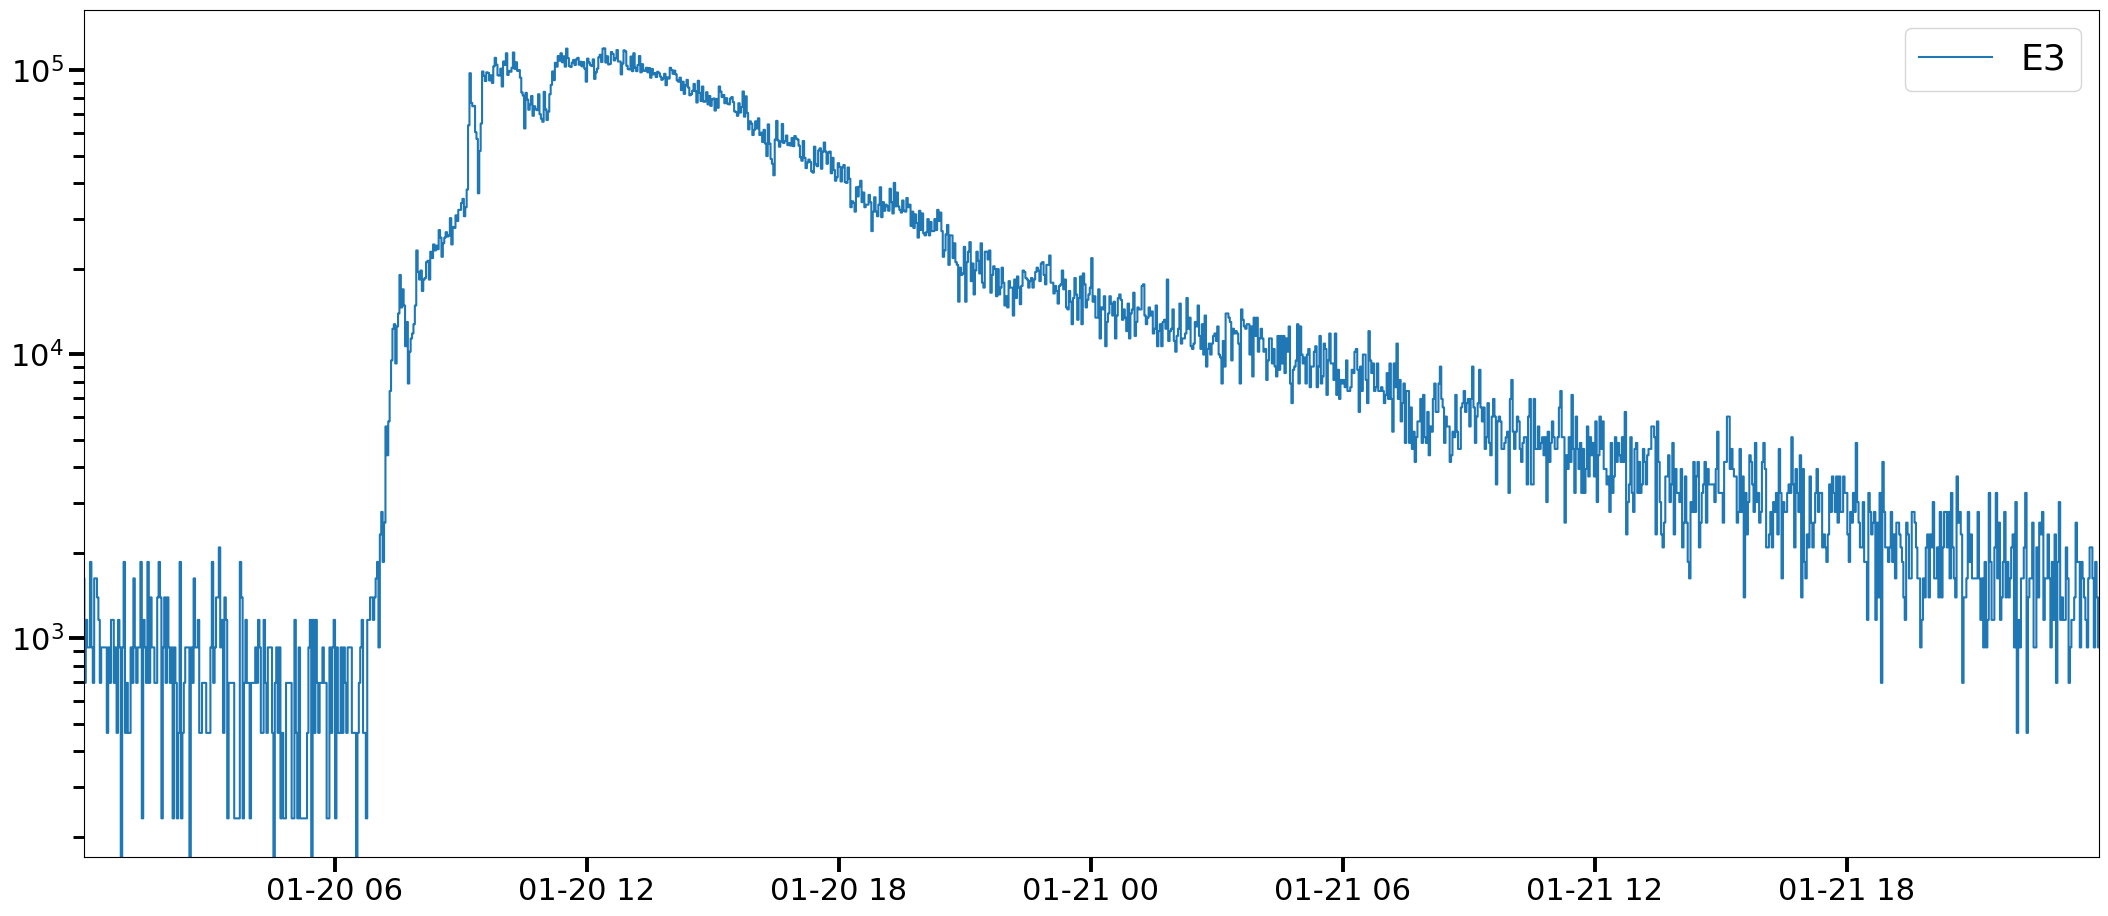

In [4]:
channel = "E3"
reg.quicklook(data=df, channel=channel, resample="2 min")

Regression converged: True


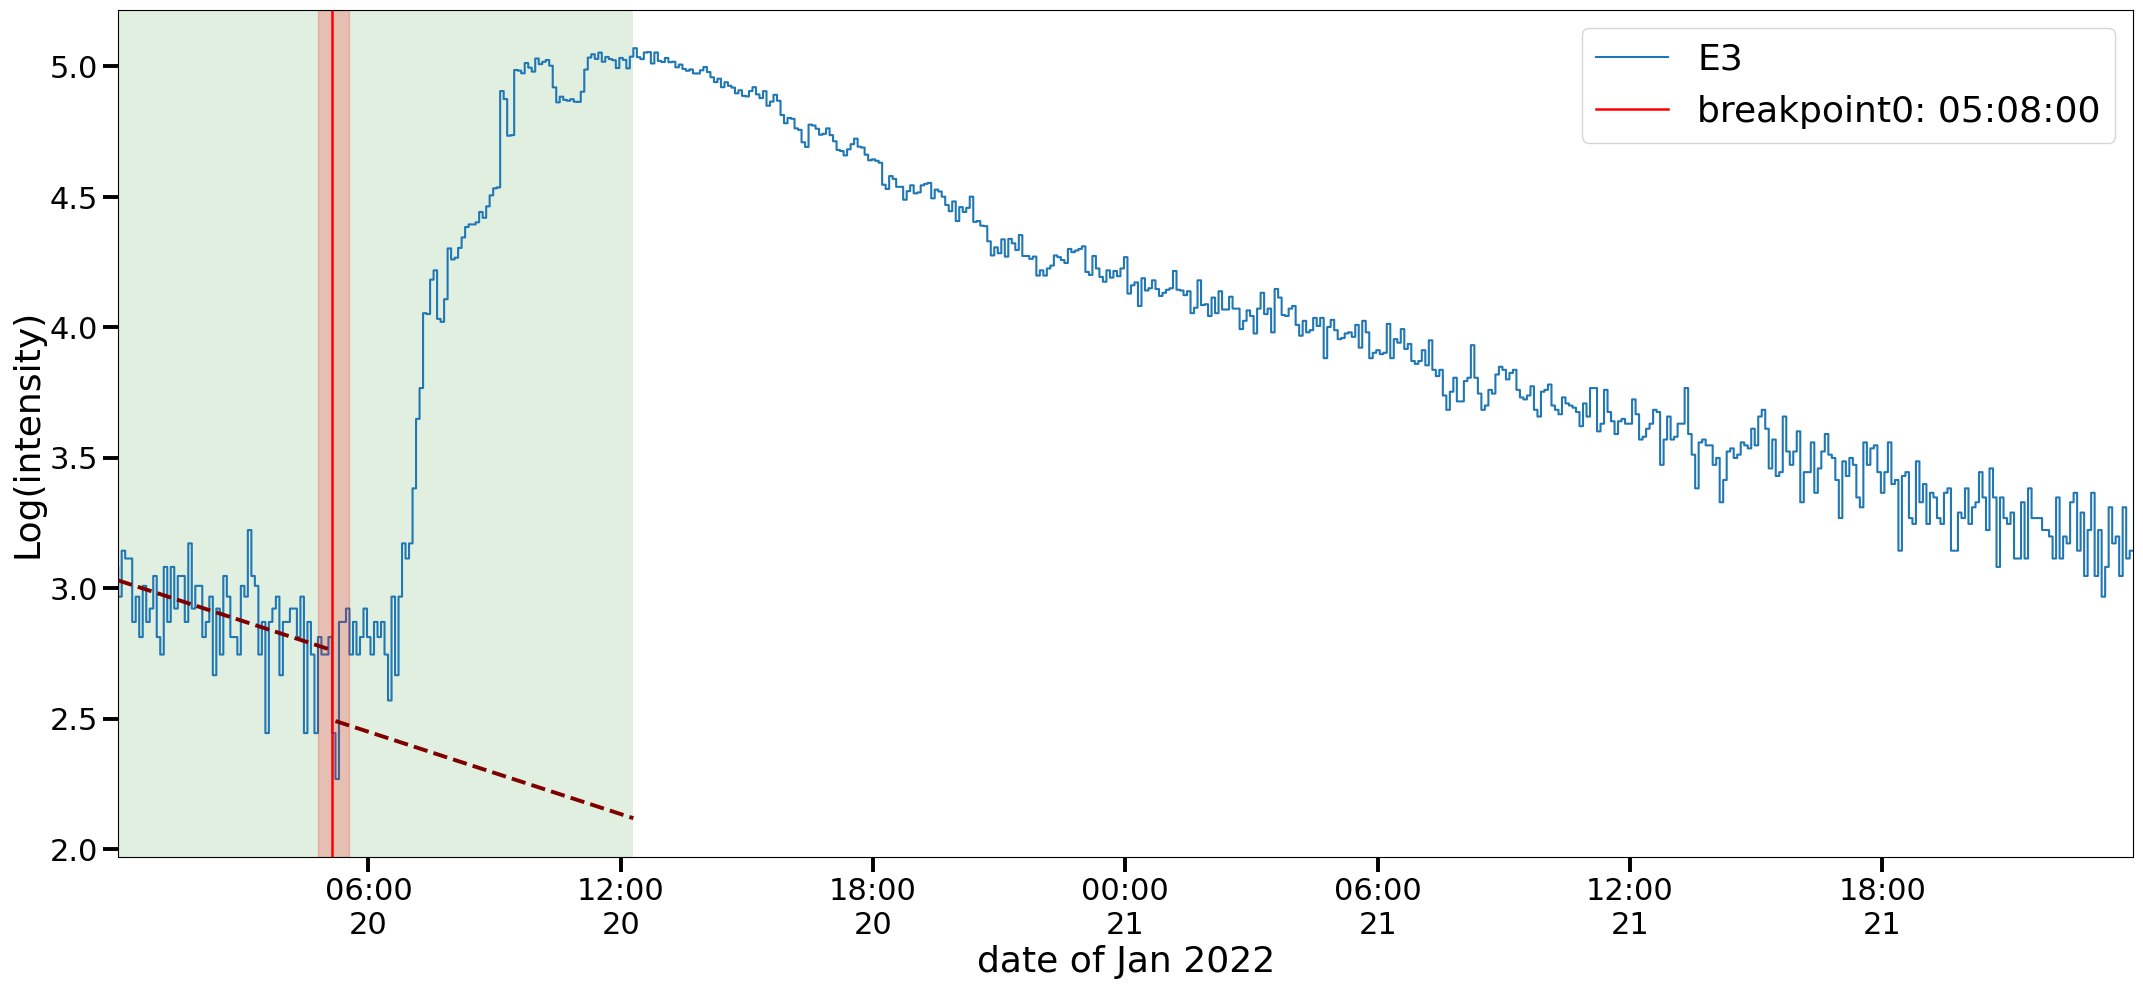

In [11]:
results, data = reg.workflow(data=df, channel=channel, window=20, threshold=5, diagnostics=True, breaks=1,
                              index_choice="counting_numbers", resample="5 min", plot_style="step")

In [10]:
results

{'const': np.float64(3.0113973040681716),
 'series': (datetime
  2022-01-20 00:01:30.451561    3.210515
  2022-01-20 00:03:30.451561    2.842538
  2022-01-20 00:05:30.451561    3.064387
  2022-01-20 00:07:30.451561    2.967477
  2022-01-20 00:09:30.451561    2.967477
                                  ...   
  2022-01-20 10:05:30.451561    5.060022
  2022-01-20 10:07:30.451561    4.983465
  2022-01-20 10:09:30.451561    4.997874
  2022-01-20 10:11:30.451561    4.994827
  2022-01-20 10:13:30.451561    5.008870
  Name: E3, Length: 302, dtype: float64,),
 'indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,

In [27]:
kek = data[data["counting_numbers"].isin(results["line"].index)]
kek.index

DatetimeIndex(['2022-01-20 06:45:30.451561', '2022-01-20 06:47:30.451561',
               '2022-01-20 06:49:30.451561', '2022-01-20 06:51:30.451561',
               '2022-01-20 06:53:30.451561', '2022-01-20 06:55:30.451561',
               '2022-01-20 06:57:30.451561', '2022-01-20 06:59:30.451561',
               '2022-01-20 07:01:30.451561', '2022-01-20 07:03:30.451561',
               '2022-01-20 07:05:30.451561', '2022-01-20 07:07:30.451561',
               '2022-01-20 07:09:30.451561', '2022-01-20 07:11:30.451561',
               '2022-01-20 07:13:30.451561', '2022-01-20 07:15:30.451561',
               '2022-01-20 07:17:30.451561', '2022-01-20 07:19:30.451561',
               '2022-01-20 07:21:30.451561', '2022-01-20 07:23:30.451561'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [28]:
data["counting_numbers"].isin(results["line"].index)

datetime
2022-01-20 00:01:30.451561    False
2022-01-20 00:03:30.451561    False
2022-01-20 00:05:30.451561    False
2022-01-20 00:07:30.451561    False
2022-01-20 00:09:30.451561    False
                              ...  
2022-01-21 23:51:30.451561    False
2022-01-21 23:53:30.451561    False
2022-01-21 23:55:30.451561    False
2022-01-21 23:57:30.451561    False
2022-01-21 23:59:30.451561    False
Name: counting_numbers, Length: 1435, dtype: bool

In [20]:
kek = data.loc[data["counting_numbers"]==results["line"].index]

ValueError: ('Lengths must match to compare', (1435,), (20,))

In [15]:
kek

,E3,time_s,counting_numbers
datetime,,,
2022-01-20 00:03:30.451561,695.886475,1642629810,1


In [9]:
results["line"]

202    2.425296
203    2.423909
204    2.422523
205    2.421136
206    2.419749
207    2.418362
208    2.416975
209    2.415588
210    2.414201
211    2.412814
212    2.411427
213    2.410041
214    2.408654
215    2.407267
216    2.405880
217    2.404493
218    2.403106
219    2.401719
220    2.400332
221    2.398945
dtype: float64

Text(0, 0.5, 'log(Intensity)')

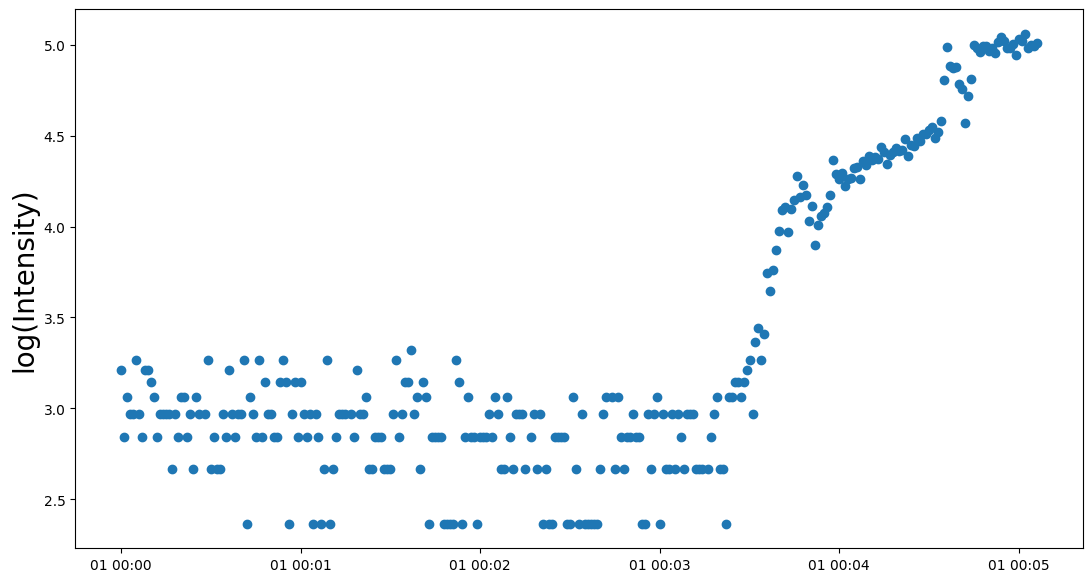

In [11]:
fig, ax = plt.subplots(figsize=(13,7))

ax.scatter(pd.to_datetime(results["indices"], unit='s'), results["series"][0].values)
ax.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE)

In [12]:
tresult1 = reg.break_regression(ints=results["series"][0].values, indices=results["indices"])

In [13]:
tresult1["estimates"]

{'const': {'estimate': np.float64(3.0113973040681743),
  'se': np.float64(0.03608036072905531),
  'confidence_interval': (np.float64(2.9403927234146887),
   np.float64(3.08240188472166)),
  't_stat': np.float64(83.46361408862282),
  'p_t': np.float64(1.035065094103053e-208)},
 'beta1': {'estimate': np.float64(0.02204083809097918),
  'se': np.float64(0.0006701620887643327),
  'confidence_interval': (np.float64(0.02072198824798812),
   np.float64(0.02335968793397024)),
  't_stat': np.float64(32.88881669152431),
  'p_t': '-'},
 'breakpoint1': {'estimate': np.float64(175.35489725221427),
  'se': np.float64(2.5588311896657063),
  'confidence_interval': (np.float64(170.31922876348546),
   np.float64(180.3905657409431)),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': np.float64(-0.001824220492926499),
  'se': np.float64(0.00035351048089878636),
  'confidence_interval': (np.float64(-0.0025199137439259746),
   np.float64(-0.0011285272419270234)),
  't_stat': np.float64(-5.1603010136743

In [14]:
results

{'const': np.float64(3.01139730406817),
 'slope1': np.float64(-0.0018242204929264727),
 'slope2': np.float64(0.020216617598052697),
 'onset_time': Timestamp('2022-01-20 05:51:30.451561'),
 'onset_time_error_minus': Timestamp('2022-01-20 05:41:30.451561'),
 'onset_time_error_plus': Timestamp('2022-01-20 06:01:30.451561'),
 'line1': 0      3.011397
 1      3.009573
 2      3.007749
 3      3.005925
 4      3.004100
          ...   
 171    2.699456
 172    2.697631
 173    2.695807
 174    2.693983
 175    2.692159
 Length: 172, dtype: float64,
 'line2': (176    2.692159
  177    2.712532
  178    2.732905
  179    2.753279
  180    2.773652
           ...   
  302    5.238826
  303    5.259199
  304    5.279572
  305    5.299946
  306    5.320319
  Length: 130, dtype: float64,),
 'series': (datetime
  2022-01-20 00:01:30.451561    3.210515
  2022-01-20 00:03:30.451561    2.842538
  2022-01-20 00:05:30.451561    3.064387
  2022-01-20 00:07:30.451561    2.967477
  2022-01-20 00:09:30.4515

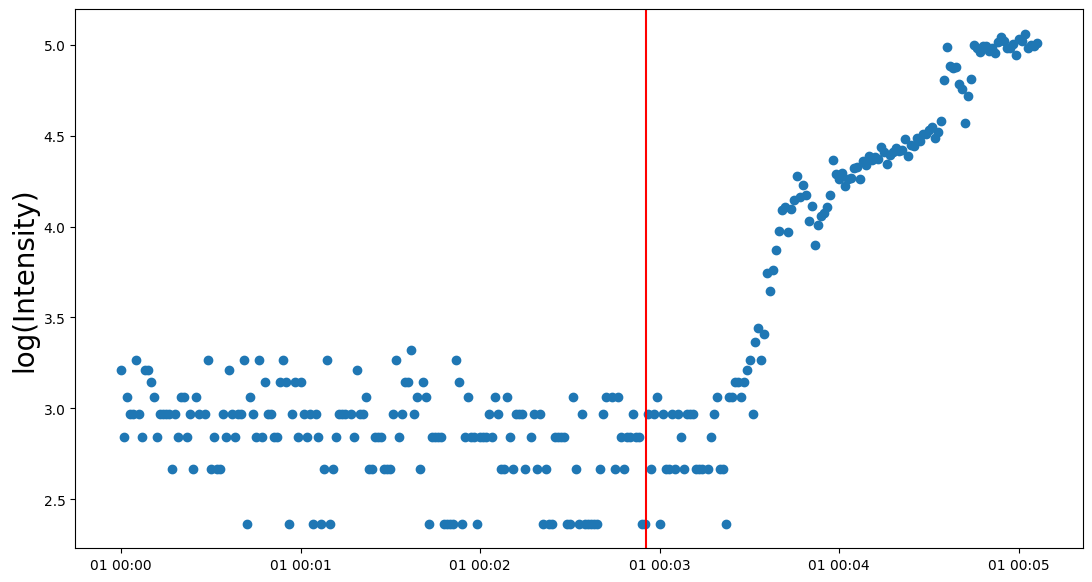

In [15]:
ax.axvline(x=pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s'), color="red")

fig

In [16]:
pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s')

Timestamp('1970-01-01 00:02:55.354897252')

In [17]:
fit1, fit2 = reg.calc_utilities.generate_fit_lines(indices=results["indices"],
                                                  const=tresult1["estimates"]["const"]["estimate"],
                                                  alpha1=tresult1["estimates"]["alpha1"]["estimate"],
                                                  alpha2=tresult1["estimates"]["alpha2"]["estimate"],
                                                  break_point=tresult1["estimates"]["breakpoint1"]["estimate"])

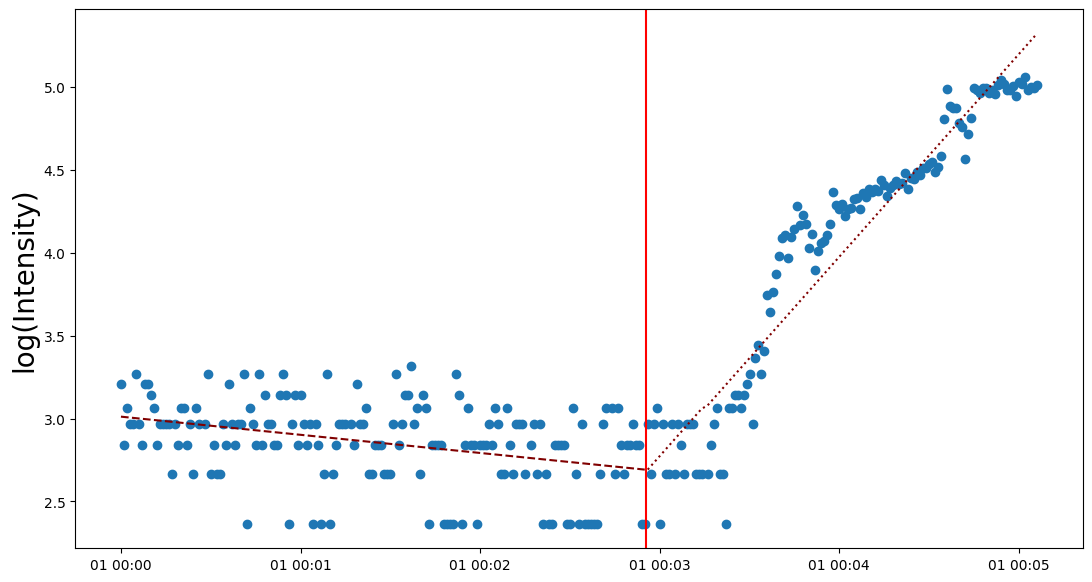

In [18]:
ax.plot(pd.to_datetime(fit1.index, unit='s'), fit1.values, color="maroon", ls="--")
ax.plot(pd.to_datetime(fit2.index, unit='s'), fit2.values, color="maroon", ls=":")

fig

/tmp/ipykernel_21408/385658496.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axx.legend()


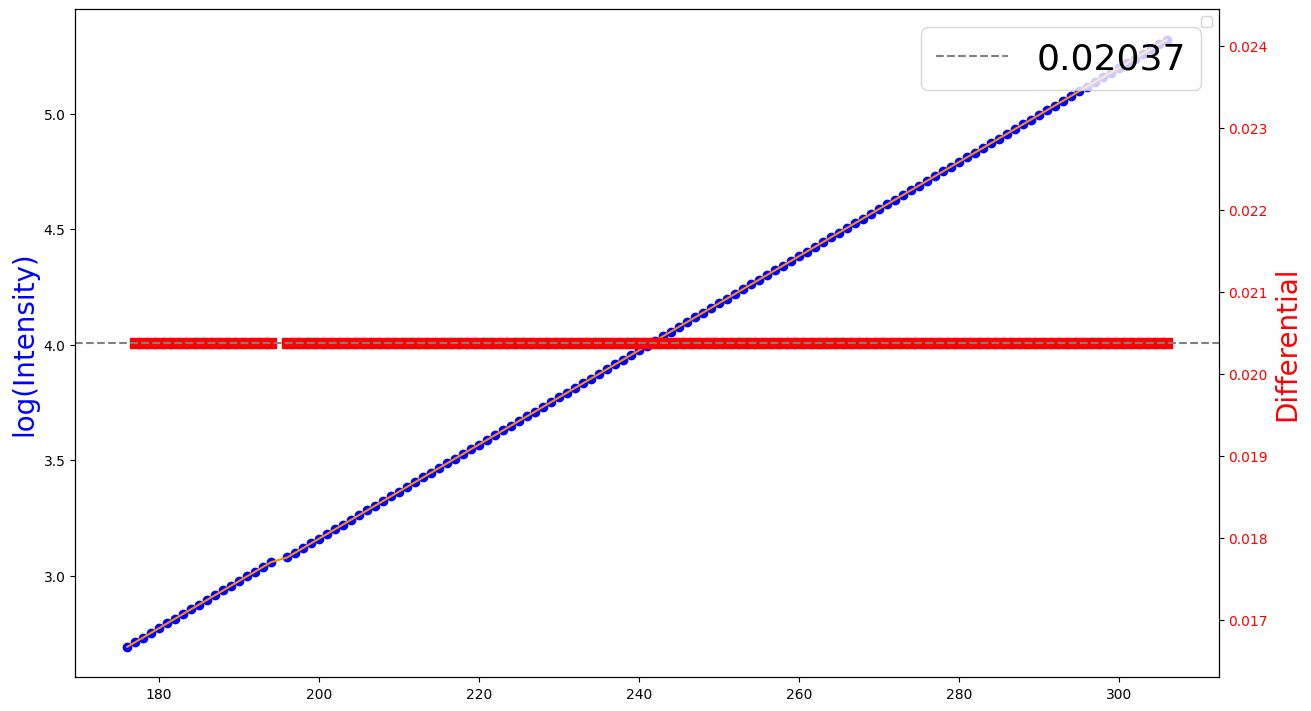

In [19]:
figg, axx = plt.subplots(figsize=(13,7), layout="constrained")

axx.scatter(fit2.index, fit2.values, color="blue")
axx.plot(fit2.index, fit2.values, color="darkorange")
axx.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="blue")

axx.legend()

axx1 = axx.twinx()
diff2_mode = fit2.diff().mode()[0]
axx1.set_ylim([diff2_mode-diff2_mode/5, diff2_mode+diff2_mode/5])
axx1.scatter(fit2.index, fit2.diff(), s=55, marker='s', color="red")
axx1.axhline(y=diff2_mode, label=f"{np.round(diff2_mode,5)}", ls="--", color="grey")
axx1.set_ylabel("Differential", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="red")
axx1.tick_params(axis='y', labelcolor="red")

axx1.legend(fontsize=reg.plotting_utilities.STANDARD_LEGENDSIZE)

plt.show()